In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import csv
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [4]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)

C:\Users\Ankur Jain\Desktop\Kartik Jain\Pendrive\Final Project\Traffic-Signal-Classifier


In [6]:
for i in range(classes):
    path = os.path.join(cur_path,'Images\\train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [22]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [24]:
labels_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    labels_dict = {int(rows[0]):rows[1] for rows in reader}

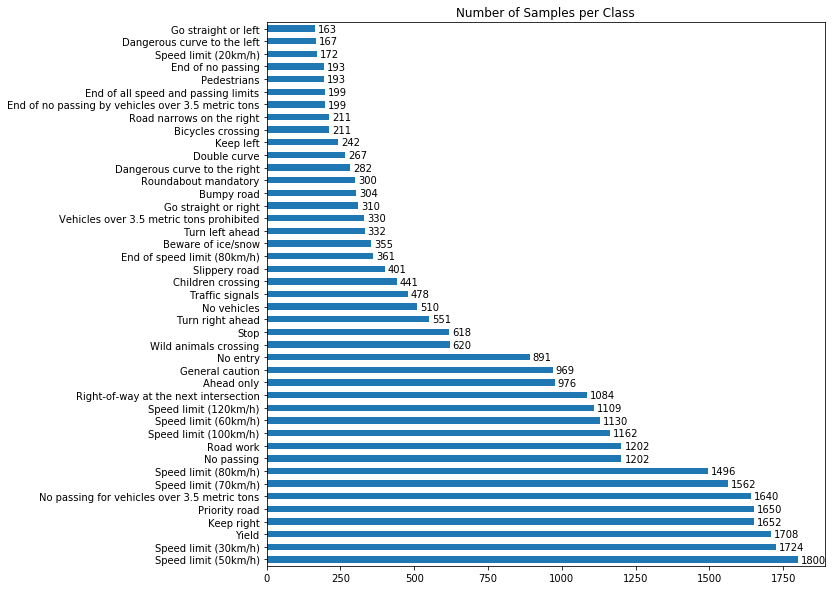

In [25]:
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train
ax = y_train_df['label'].value_counts().plot(kind='barh', figsize = (10,10), title='Number of Samples per Class')
ax.set_yticklabels(list(map(lambda x: labels_dict[x], y_train_df['label'].value_counts().index.tolist())))            
for i, v in enumerate(y_train_df['label'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='black')

In [26]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [27]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 94s 96ms/step - loss: 1.7729 - accuracy: 0.5424 - val_loss: 0.3949 - val_accuracy: 0.9007
Epoch 2/15
981/981 [==============================] - 92s 94ms/step - loss: 0.5289 - accuracy: 0.8491 - val_loss: 0.1445 - val_accuracy: 0.9614
Epoch 3/15
981/981 [==============================] - 94s 95ms/step - loss: 0.3671 - accuracy: 0.8955 - val_loss: 0.1253 - val_accuracy: 0.9677
Epoch 4/15
981/981 [==============================] - 93s 95ms/step - loss: 0.3175 - accuracy: 0.9111 - val_loss: 0.1195 - val_accuracy: 0.9644
Epoch 5/15
981/981 [==============================] - 100s 102ms/step - loss: 0.2823 - accuracy: 0.9213 - val_loss: 0.0879 - val_accuracy: 0.9749
Epoch 6/15
981/981 [==============================] - 92s 94ms/step - loss: 0.2796 - accuracy: 0.9255 - val_loss: 0.1278 - val_accuracy: 0.9688
Epoch 7/15
981/981 [==============================] - 92s 94ms/step - loss: 0.2960 - accuracy: 0.9213 - val_loss: 0.0829 - val_accurac

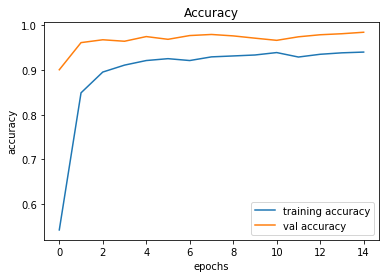

In [29]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

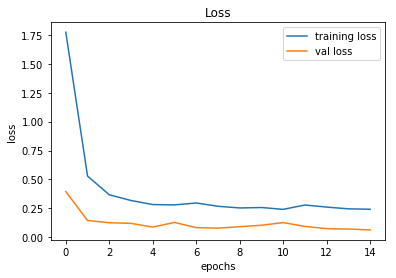

In [30]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import accuracy_score

path = os.path.join(cur_path,'Images')
y_test = pd.read_csv(os.path.join(path,'Test.csv'))
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

In [66]:
for i in imgs:
    try:
        img = os.path.join(path,i)
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    except:
        print("Error")

X_test=np.array(data)

pred = model.predict_classes(X_test)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9547215049797123


In [68]:
!pip install pyinstaller

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Stored in directory: C:\Users\Ankur Jain\AppData\Local\pip\Cache\wheels\4e\d9\60\db7ac8941a22cb24131ec3cf40d094b9984518671f85b93780
Successfully built pyinstaller
  Stored in directory: C:\Users\Ankur Jain\AppData\Local\pip\Cache\wheels\d6\7d\79\6d4efc404f6bd245244465f13a73bb7d303f83d70beb67b071
Successfully built pefile
